In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as pt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('winequalityN.csv')

#### Exploratary Data Analysis

In [3]:
df.head()

type  fixed acidity  volatile acidity  citric acid  residual sugar  \
0  white            7.0              0.27         0.36            20.7   
1  white            6.3              0.30         0.34             1.6   
2  white            8.1              0.28         0.40             6.9   
3  white            7.2              0.23         0.32             8.5   
4  white            7.2              0.23         0.32             8.5   

   chlorides  free sulfur dioxide  total sulfur dioxide  density    pH  \
0      0.045                 45.0                 170.0   1.0010  3.00   
1      0.049                 14.0                 132.0   0.9940  3.30   
2      0.050                 30.0                  97.0   0.9951  3.26   
3      0.058                 47.0                 186.0   0.9956  3.19   
4      0.058                 47.0                 186.0   0.9956  3.19   

   sulphates  alcohol  quality  
0       0.45      8.8        6  
1       0.49      9.5        6  
2       0.44     10.1        6  
3       0.40      9.9        6  
4       0.40      9.9        6

In [4]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
df['type']=label.fit_transform(df['type']) #white=1,red=0

In [5]:
## info about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   int32  
 1   fixed acidity         6487 non-null   float64
 2   volatile acidity      6489 non-null   float64
 3   citric acid           6494 non-null   float64
 4   residual sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int32(1), int64(1)
memory usage: 634.6 KB


In [6]:
## size of the dataframe
df.shape

(6497, 13)

In [7]:
## duplicated rows
df.duplicated().any()

True

In [8]:
## droping druplicate
df.drop_duplicates(inplace=True)

In [9]:
df.shape ## shape of df after removing the dataset

(5329, 13)

In [10]:
## Missing values
df.isnull().sum()

type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64

<Axes: >

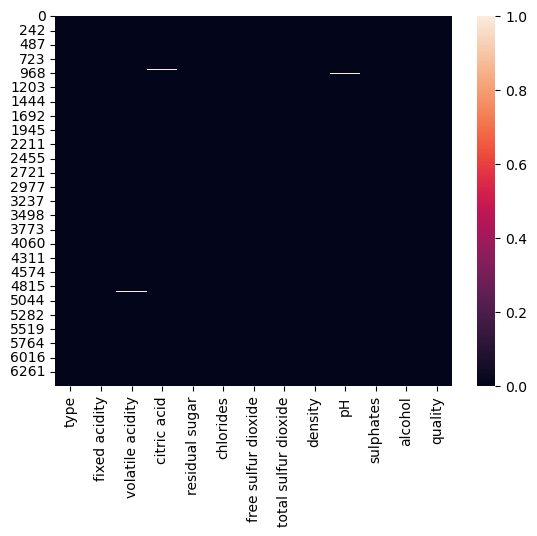

In [11]:
sns.heatmap(df.isnull())

- columns are fixed acidity,volatile acidity,citric acide,residual sugar,chlorides,pH,sulphates are have the some of null values init

### Handling Missing Values

In [12]:
## missing columns
columns_having_missing ={}
for column in df.columns:
    if df[column].isnull().sum() > 0: 
        columns_having_missing[column] = df[column].isnull().sum()
print(columns_having_missing)

{'fixed acidity': 10, 'volatile acidity': 8, 'citric acid': 3, 'residual sugar': 2, 'chlorides': 2, 'pH': 9, 'sulphates': 4}


#### histplots before filling the miss values in columns

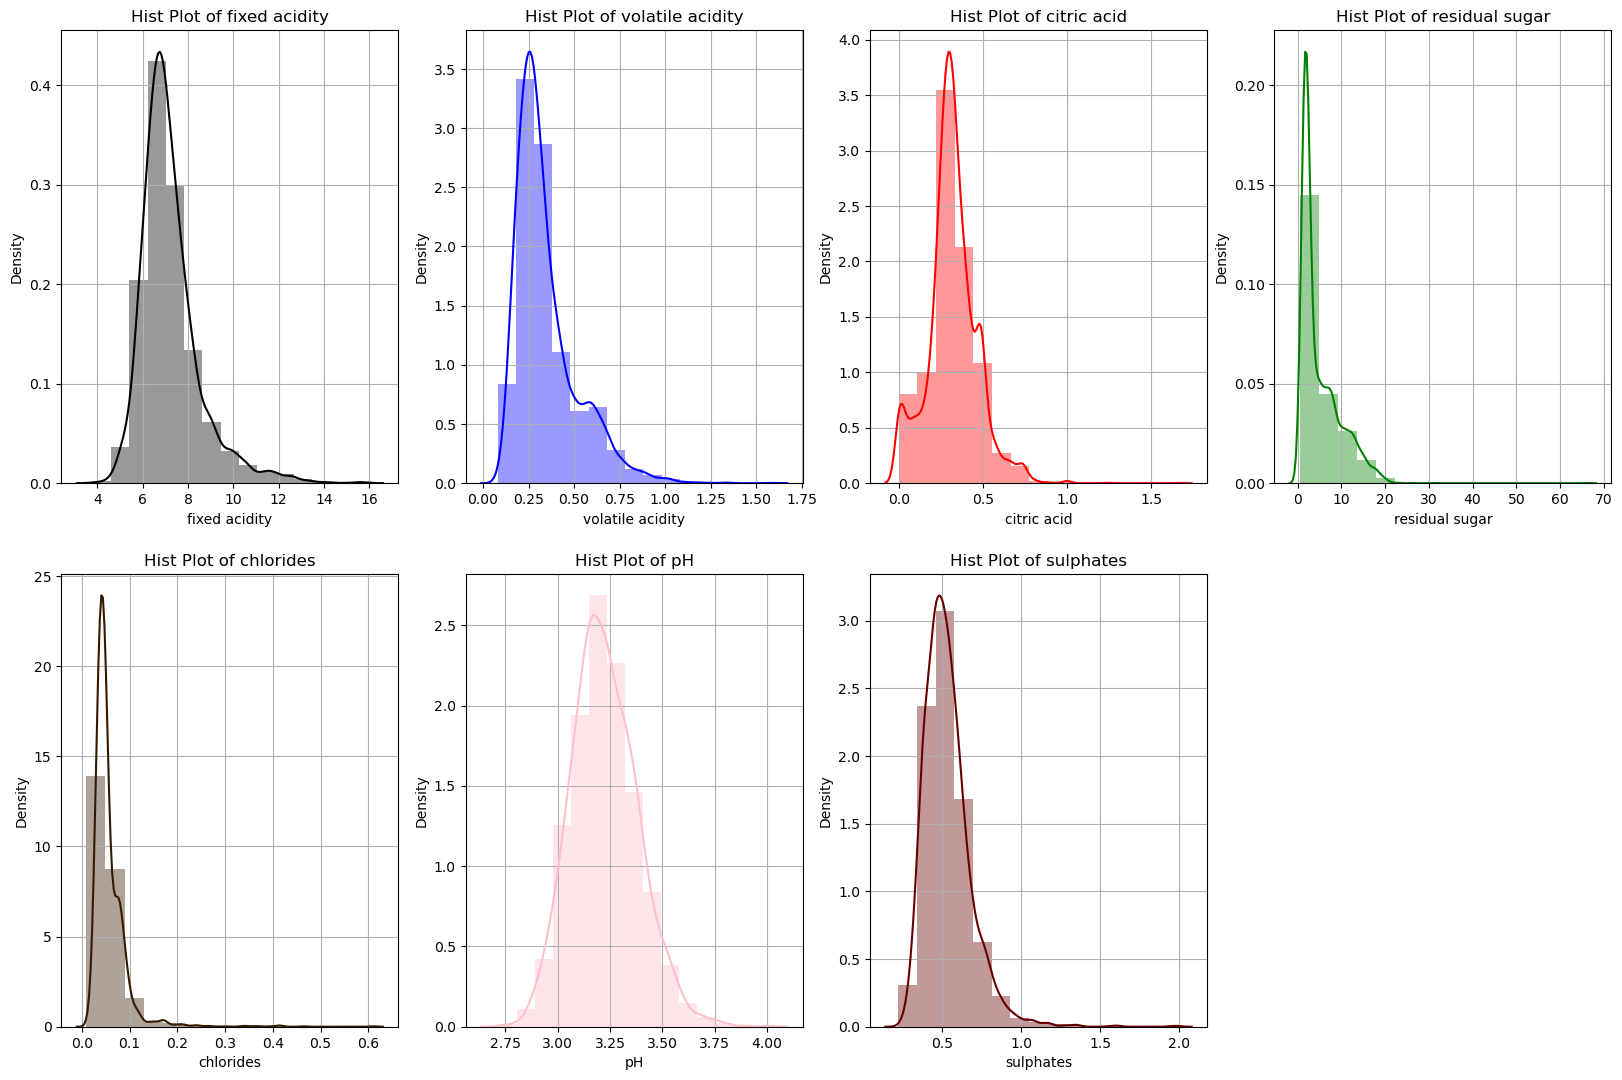

In [13]:
## histplots before filling the miss values in columns
pt.figure(figsize=(20, 20))
color = ['k','b','r','g','#331900','pink','#660000']
for i, feature in enumerate(list(columns_having_missing.keys())):
    pt.subplot(3,4 ,i + 1)
    sns.distplot(df[feature],color=color[i],bins=15)
    pt.grid(axis='both')
    pt.title(f'Hist Plot of {feature}')

In [14]:
##Filling the missing values with its column's mean 
for feature in columns_having_missing.keys():
    df[feature].fillna(df[feature].mean(),inplace=True)

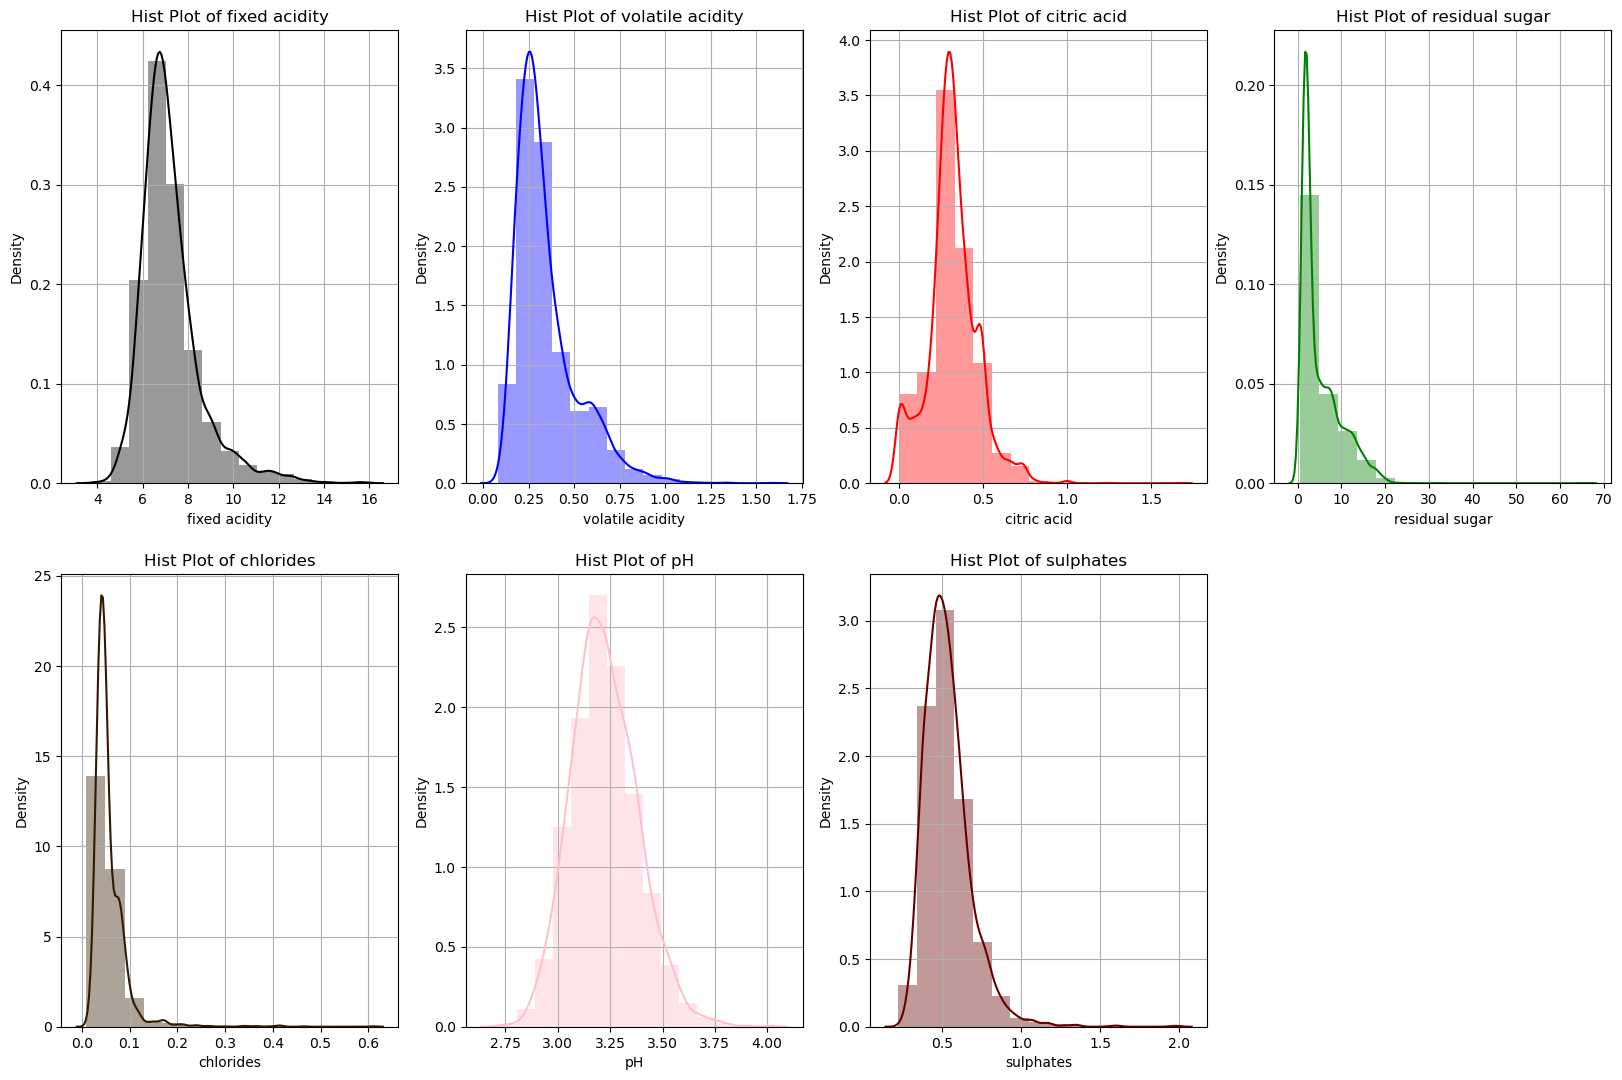

In [15]:
## seeing the distribution after filling the histplots
pt.figure(figsize=(20, 20))
color = ['k','b','r','g','#331900','pink','#660000']
for i, feature in enumerate(list(columns_having_missing.keys())):
    pt.subplot(3,4 ,i + 1)
    sns.distplot(df[feature],color=color[i],bins=15)
    pt.grid(axis='both')
    pt.title(f'Hist Plot of {feature}')

<Axes: >

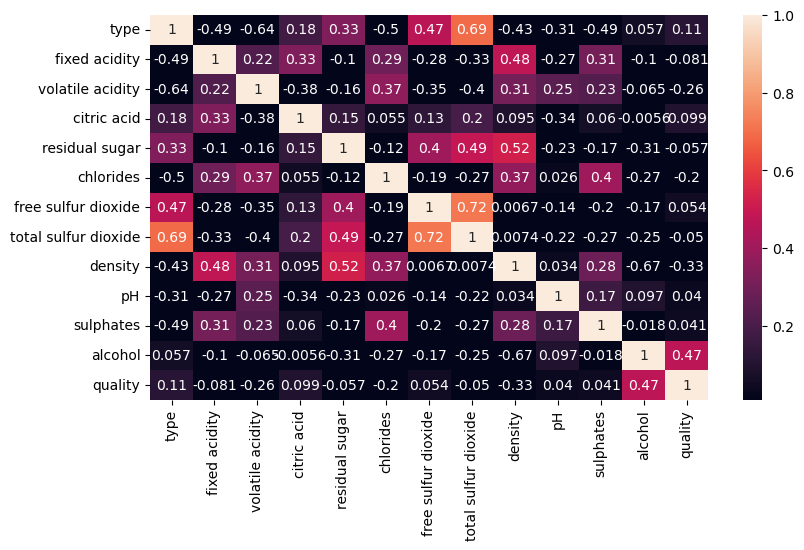

In [16]:
## corrlation matrxi
pt.figure(figsize=(9,5))
sns.heatmap(df.corr(),annot=True,vmin=0.01)

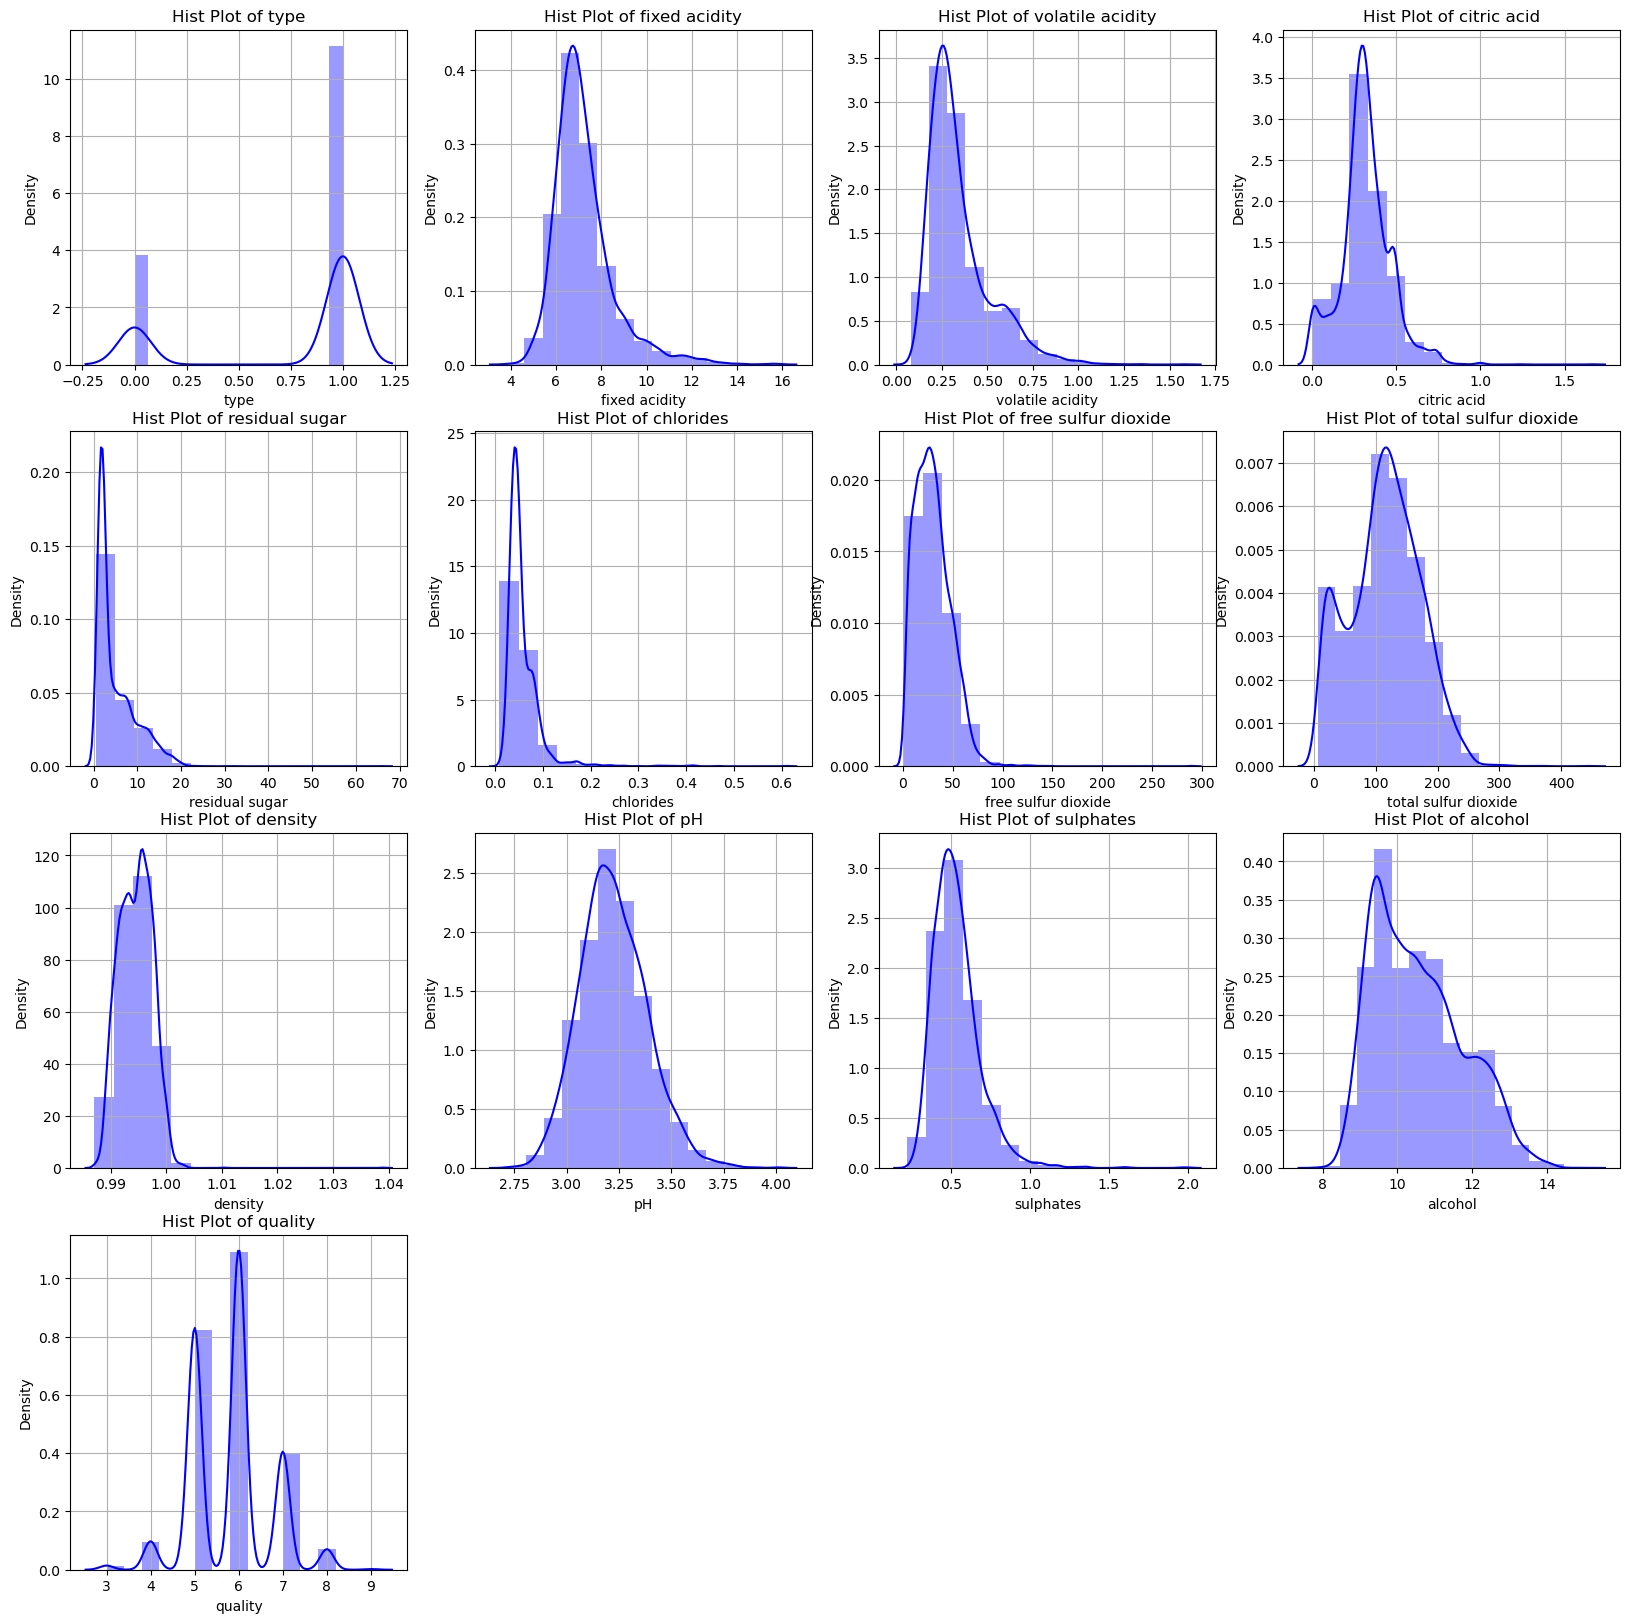

In [17]:
## Univaraity analysis
pt.figure(figsize=(20, 20))
for i, feature in enumerate(df.columns):
    pt.subplot(4,4 ,i + 1)
    sns.distplot(df[feature],color='blue',bins=15)
    pt.grid(axis='both')
    pt.title(f'Hist Plot of {feature}')

In [109]:
df.head()

type  fixed acidity  volatile acidity  citric acid  residual sugar  \
0     1            7.0              0.27         0.36            20.7   
1     1            6.3              0.30         0.34             1.6   
2     1            8.1              0.28         0.40             6.9   
3     1            7.2              0.23         0.32             8.5   
6     1            6.2              0.32         0.16             7.0   

   chlorides  free sulfur dioxide  total sulfur dioxide  density    pH  \
0      0.045                 45.0                 170.0   1.0010  3.00   
1      0.049                 14.0                 132.0   0.9940  3.30   
2      0.050                 30.0                  97.0   0.9951  3.26   
3      0.058                 47.0                 186.0   0.9956  3.19   
6      0.045                 30.0                 136.0   0.9949  3.18   

   sulphates  alcohol  quality  
0       0.45      8.8        1  
1       0.49      9.5        1  
2       0.44     10.1        1  
3       0.40      9.9        1  
6       0.47      9.6        1

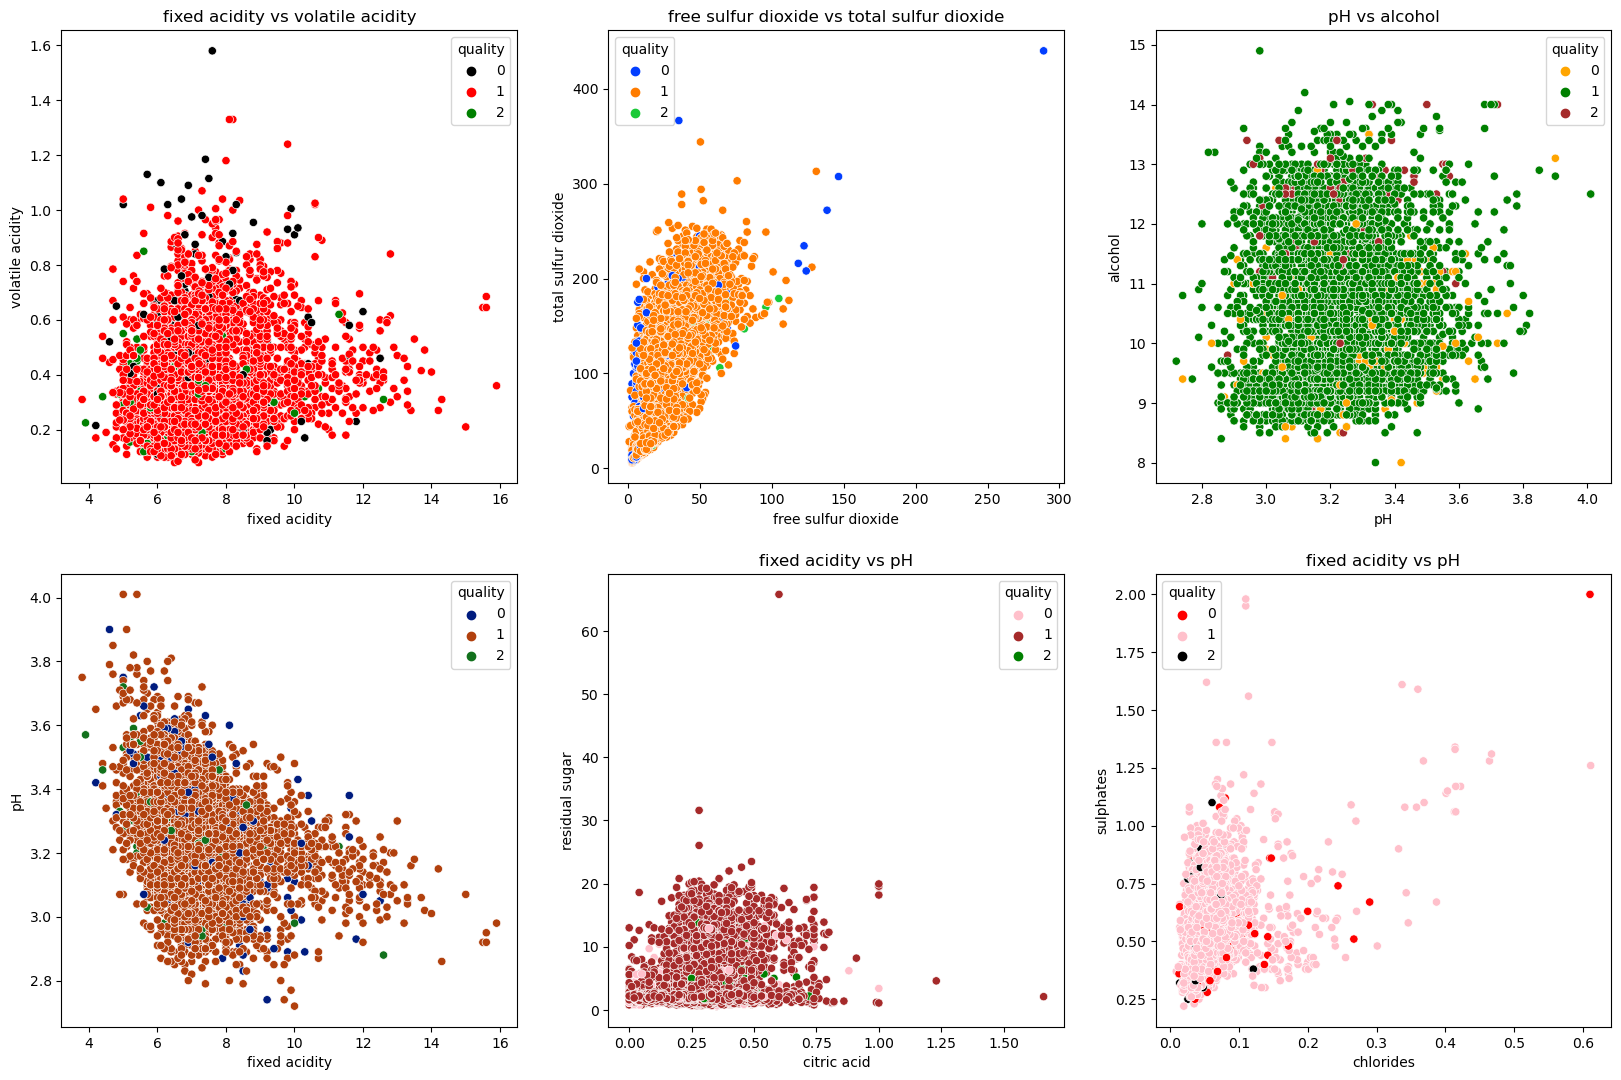

In [152]:
pt.figure(figsize=(20,20))
pt.title('Bivariat Analysis')
pt.subplot(3,3,1)
sns.scatterplot(df,x='fixed acidity',y='volatile acidity',color='g',hue='quality',palette=['black','red','green'])
pt.title('fixed acidity vs volatile acidity')

pt.subplot(3,3,2)
sns.scatterplot(df,x='free sulfur dioxide',y='total sulfur dioxide',hue='quality',palette='bright')
pt.title('free sulfur dioxide vs total sulfur dioxide')

pt.subplot(3,3,3)
sns.scatterplot(df,x='pH',y='alcohol',hue='quality',palette=['orange','green','brown'])
pt.title('pH vs alcohol')

pt.subplot(3,3,4)
sns.scatterplot(df,x='fixed acidity',y='pH',hue='quality',palette='dark')

         
pt.subplot(3,3,5)
sns.scatterplot(df,x='citric acid',y='residual sugar',hue='quality',palette=['pink','brown','green'])
pt.title('fixed acidity vs pH')

pt.subplot(3,3,6)
sns.scatterplot(df,x='chlorides',y='sulphates',hue='quality',palette=['red','pink','black'])
pt.title('fixed acidity vs pH')
pt.show()

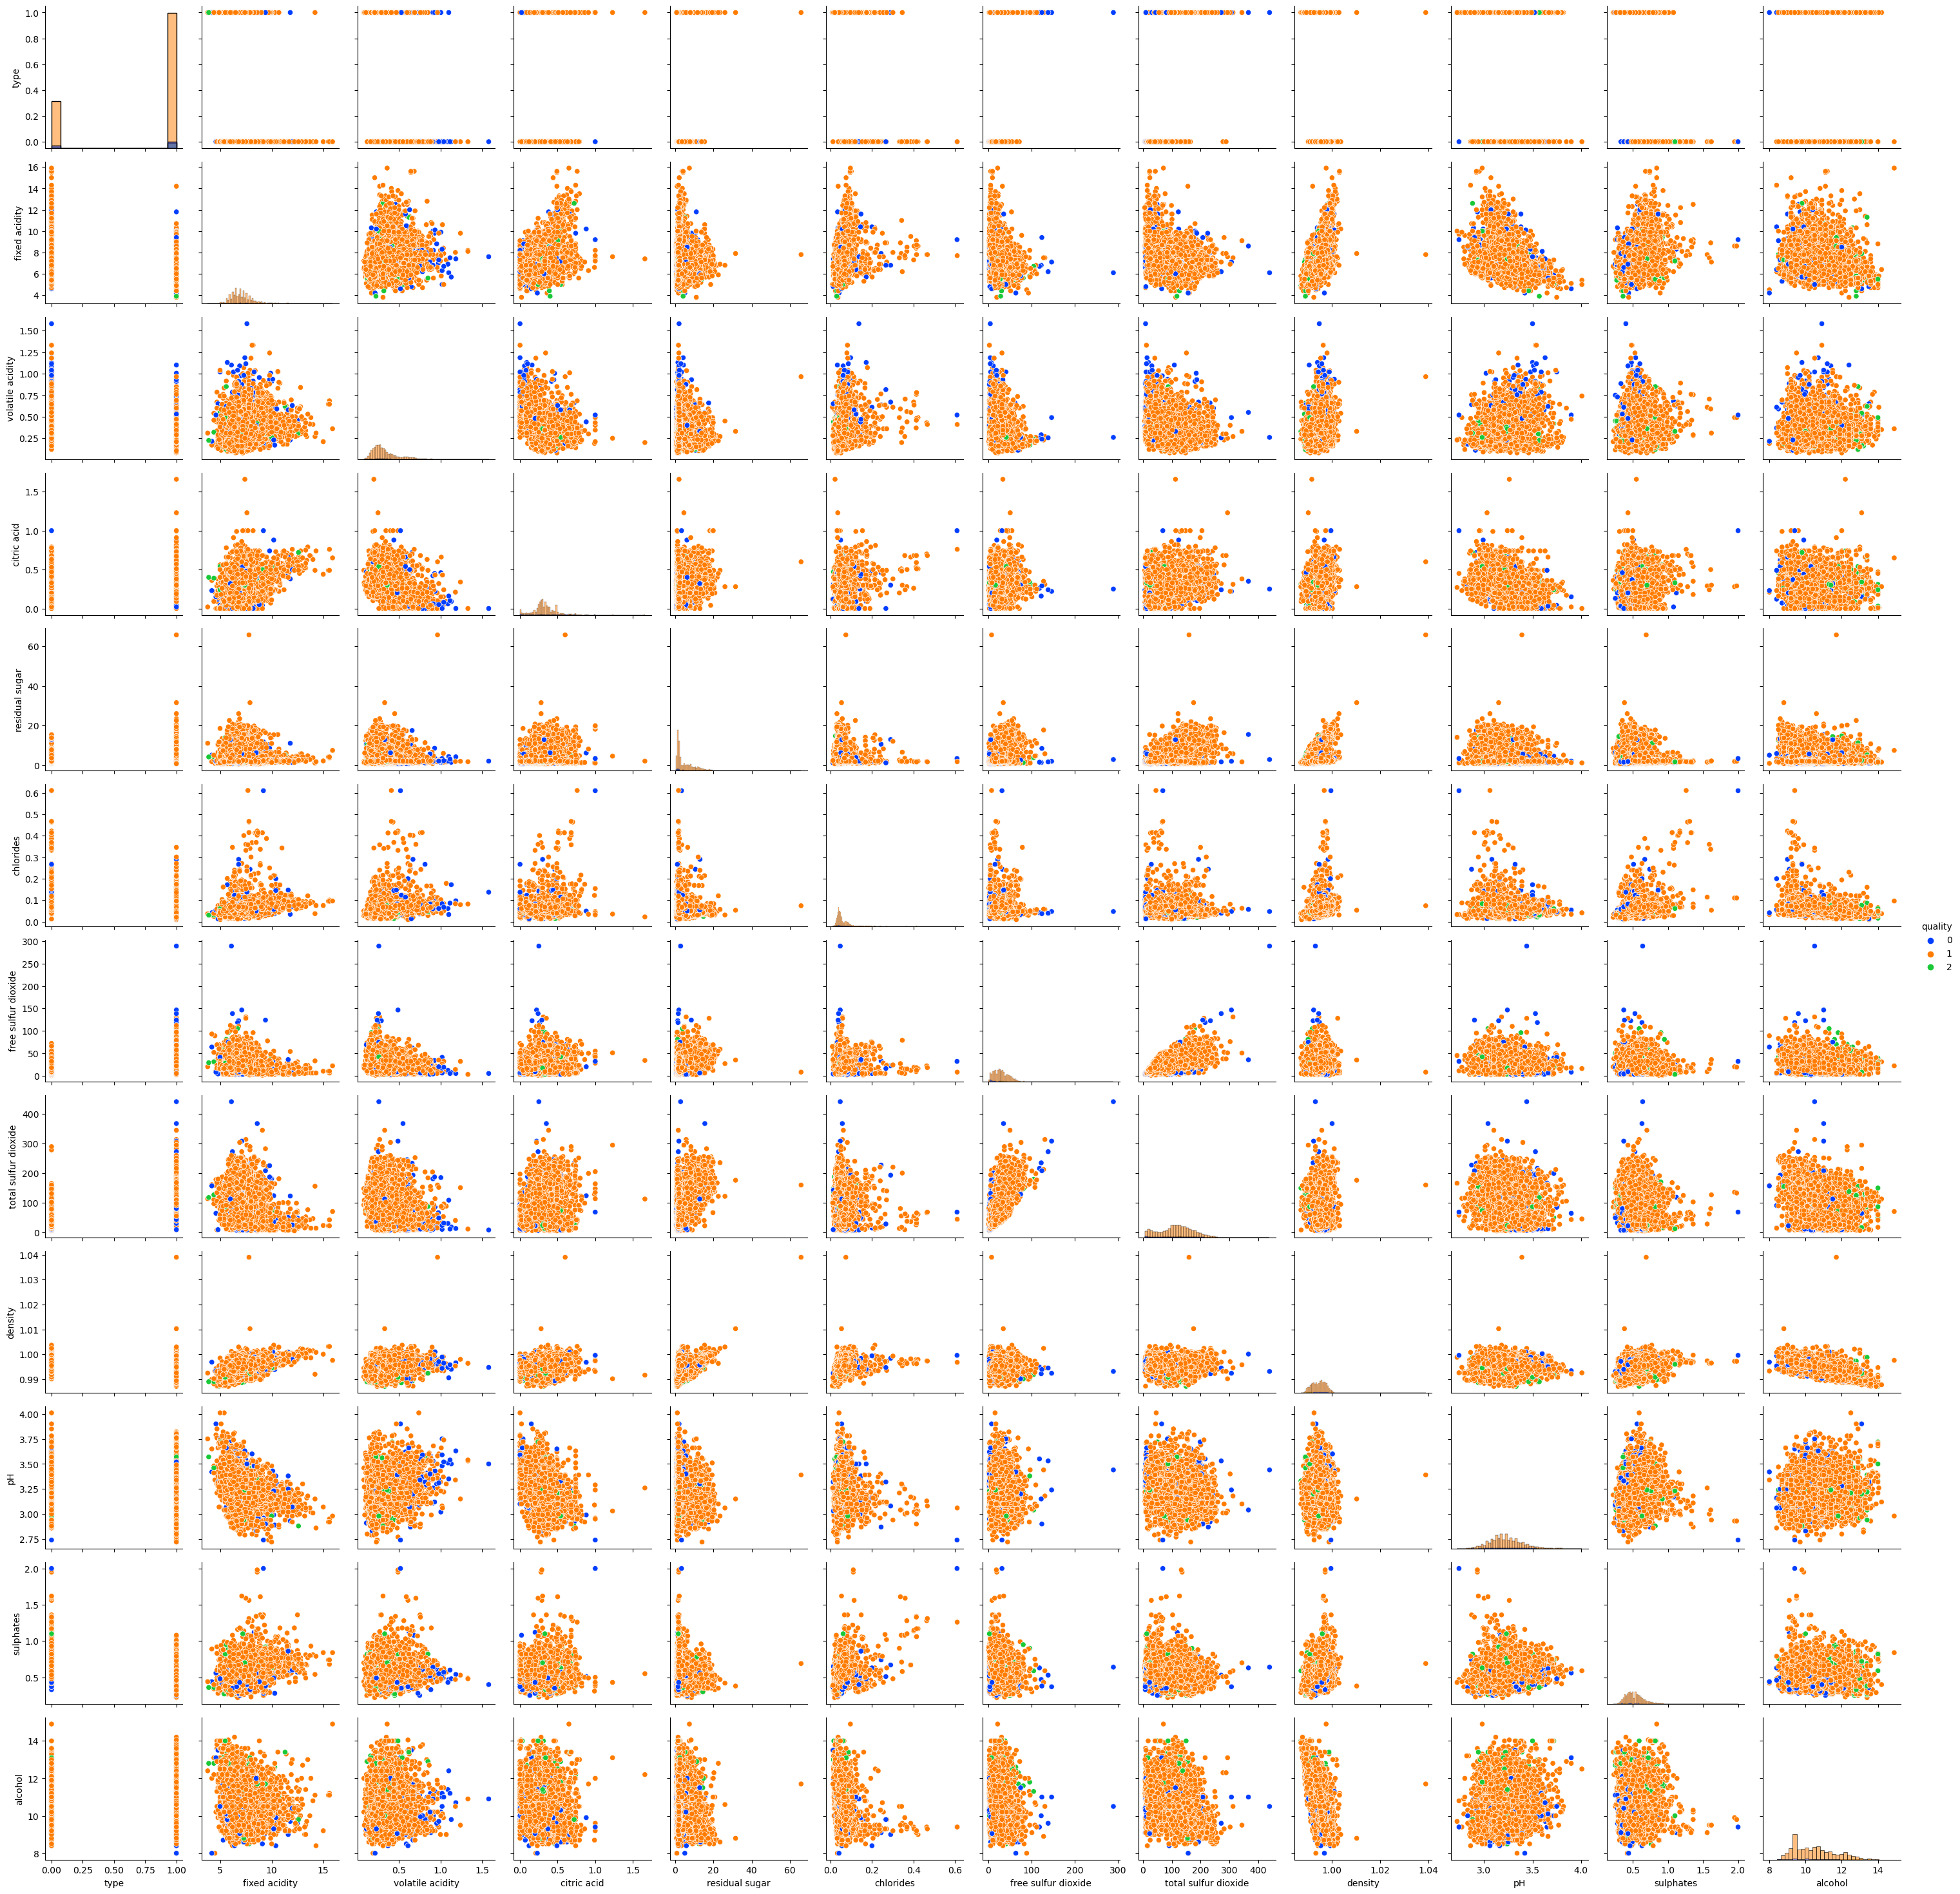

In [151]:
g = sns.PairGrid(df, hue="quality",palette='bright')
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)
g.add_legend()

### Outliers

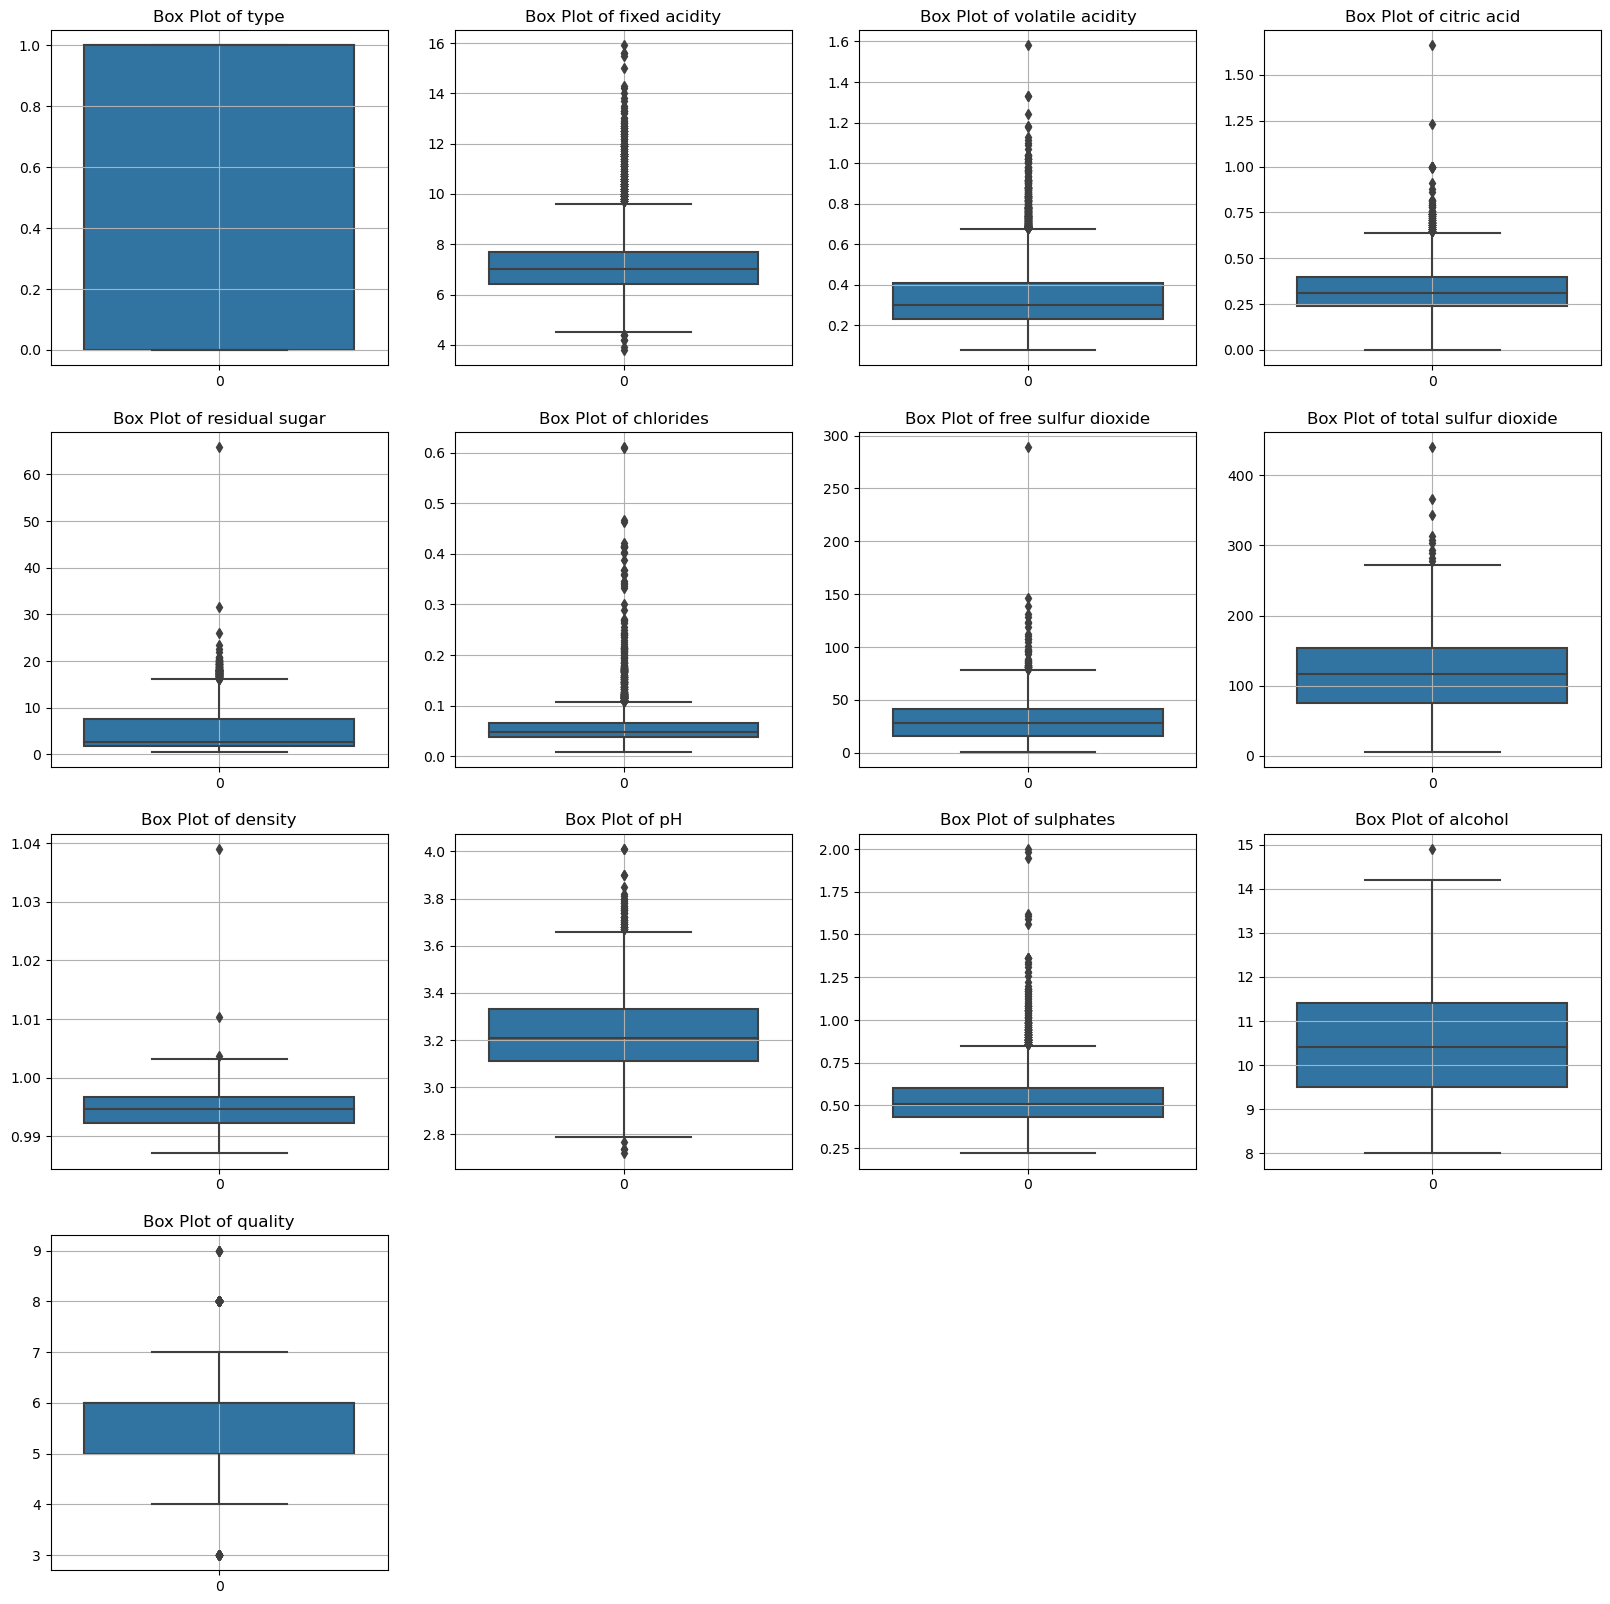

In [18]:
pt.figure(figsize=(20, 20))

for i, feature in enumerate(df.columns):
    pt.subplot(4,4 ,i + 1)
    sns.boxplot(df[feature],pa)
    pt.grid(axis='both')
    pt.title(f'Box Plot of {feature}')

##### Target column have 3,4,5,6,7,8,9 are output classes Generaizing output classes
- (3,4)   --> LOW Quality
- (5,6,7) --> MEDIUM Quality 
- (8,9)   --> HIGH Quality

In [19]:
### Mapping to output classes
df['quality'] = df['quality'].map({3:'Low',4:'Low',5:'Medium',6:'Medium',7:'Medium',8:'High',9:'High'})


In [20]:
df['quality'] = df['quality'].map({'Low':0,'Medium':1,"High":2})

In [21]:
df.quality.unique()

array([1, 2, 0], dtype=int64)

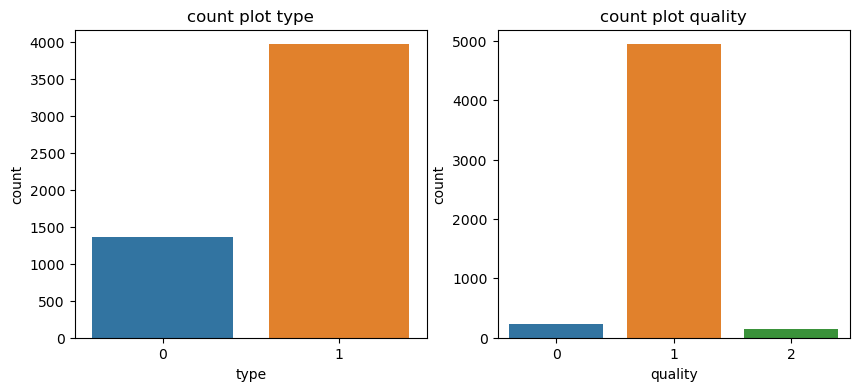

In [22]:
## categorical feature count plot
pt.figure(figsize=(10,4))
for i,feature in enumerate(df[['type','quality']].columns):
    pt.subplot(1,2,i+1)
    sns.countplot(df,x=feature)
    pt.title('count plot '+feature)

In [23]:
##checking the data is whether is imbalanced dataset
print('Low',len(df[df['quality']==0]))
print('Medium',len(df[df['quality']==1]))
print('High',len(df[df['quality']==2]))

Low 236
Medium 4939
High 154


In [24]:
X = df.drop('quality',axis=1)
y = df.quality

In [25]:
# transform the dataset in to balanced formet
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)

In [26]:
print(X.shape)  ## previous value is (6497, 13)
print(y.shape)

(14817, 12)
(14817,)


In [154]:
y.value_counts()

1    4939
2    4939
0    4939
Name: quality, dtype: int64

(1000.0, 5000.0)

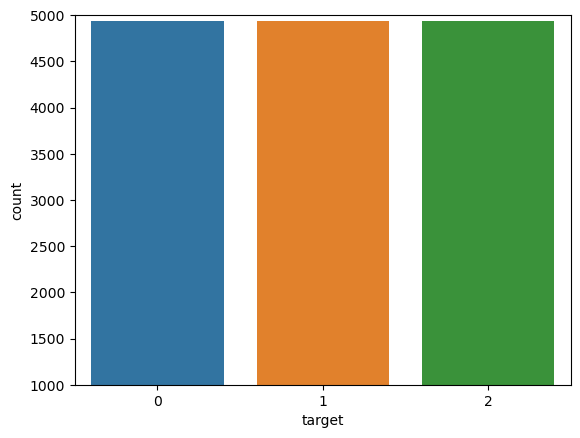

In [157]:
### The target classes in balanced formet
y_df = pd.DataFrame(np.array(y),columns=['target'])
sns.countplot(y_df,x='target')
pt.ylim([1000,5000])

In [28]:
df.head()

type  fixed acidity  volatile acidity  citric acid  residual sugar  \
0     1            7.0              0.27         0.36            20.7   
1     1            6.3              0.30         0.34             1.6   
2     1            8.1              0.28         0.40             6.9   
3     1            7.2              0.23         0.32             8.5   
6     1            6.2              0.32         0.16             7.0   

   chlorides  free sulfur dioxide  total sulfur dioxide  density    pH  \
0      0.045                 45.0                 170.0   1.0010  3.00   
1      0.049                 14.0                 132.0   0.9940  3.30   
2      0.050                 30.0                  97.0   0.9951  3.26   
3      0.058                 47.0                 186.0   0.9956  3.19   
6      0.045                 30.0                 136.0   0.9949  3.18   

   sulphates  alcohol  quality  
0       0.45      8.8        1  
1       0.49      9.5        1  
2       0.44     10.1        1  
3       0.40      9.9        1  
6       0.47      9.6        1

In [29]:
### Train Test Split 
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [44]:
#### Model selection
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

models = {'Logistic Regression':LogisticRegression(),
          'Support Vector Machine':SVC(),
          'DecsionTree':DecisionTreeClassifier(),
          'RadomForestClassier':RandomForestClassifier(),
         'AdaBosster':AdaBoostClassifier(),
          'XGBboost':XGBClassifier()}

In [45]:
for i in range(len(models)):
    model =list(models.values())[i]
    model.fit(X_train,y_train)
    print(list(models.keys())[i]+' score: ',model.score(X_test,y_test))
    cros_score = cross_val_score(model,X_train,y_train,cv=5)
    print(list(models.keys())[i]+' Cross_Val :',list(cros_score))
    print('mean : ',np.mean(cros_score))
    print('__'*40)


Logistic Regression score:  0.615047233468286
Logistic Regression Cross_Val : [0.6351750316322227, 0.6263180092787853, 0.6339097427245888, 0.6257383966244726, 0.5907172995780591]
mean :  0.6223716959676258
________________________________________________________________________________
Support Vector Machine score:  0.6032388663967612
Support Vector Machine Cross_Val : [0.5849852382960776, 0.6043863348797975, 0.6005904681568959, 0.5974683544303797, 0.5869198312236287]
mean :  0.5948700453973559
________________________________________________________________________________
DecsionTree score:  0.8782051282051282
DecsionTree Cross_Val : [0.8713622943905525, 0.8633487979755378, 0.8485870940531421, 0.8721518987341772, 0.8827004219409282]
mean :  0.8676301014188675
________________________________________________________________________________
RadomForestClassier score:  0.9608636977058029
RadomForestClassier Cross_Val : [0.9506537326022775, 0.9460143399409532, 0.9506537326022775, 0.94430

##### Here RandomForest,XGBbooster are giving more score compare to other models so I am taking XGBbooster as my final model and doing hyperparameter tuning on it

#### HYPER PARAMETER TUNNIG

In [32]:
Xgb = {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 0.5],
        'max_depth': [3, 5, 7],
        'min_child_weight': [1, 3, 5],
}

In [33]:
all_params = [lr_params,Sv_params,Dt_params,Rf_params,Adboo_params,Xgb]

#### XGBooster Tunning

In [35]:
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
dic = {}
grid = GridSearchCV(XGBClassifier(),param_grid=Xgb,cv=5)
grid.fit(X_train,y_train)
dic['xgb'] = grid.best_params_

In [50]:
xgb = XGBClassifier(learning_rate=0.5,max_depth= 7,min_child_weight= 1,n_estimators=200)
xgb.fit(X_train,y_train)
xgb.score(X_test,y_test)

0.9804318488529015

In [52]:
## freecodecamp.org is the providing cources with certificates

In [55]:
###Test Data
y_pred = xgb.predict(X_test)

In [89]:
### Perfomence metrics
from sklearn.metrics import f1_score,classification_report,roc_auc_score,roc_curve,accuracy_score,recall_score,precision_score,confusion_matrix

print('accuracy: ',accuracy_score(y_pred,y_test))
print('recall: ',recall_score(y_pred,y_test,average=None))
print('precision: ',precision_score(y_pred,y_test,average=None))
print('classification report: ',classification_report(y_pred,y_test))

accuracy:  0.9804318488529015
recall:  [0.97626113 0.978      0.98740818]
precision:  [0.98502994 0.96544916 0.99157007]
classification report:                precision    recall  f1-score   support

           0       0.99      0.98      0.98      1011
           1       0.97      0.98      0.97      1000
           2       0.99      0.99      0.99       953

    accuracy                           0.98      2964
   macro avg       0.98      0.98      0.98      2964
weighted avg       0.98      0.98      0.98      2964



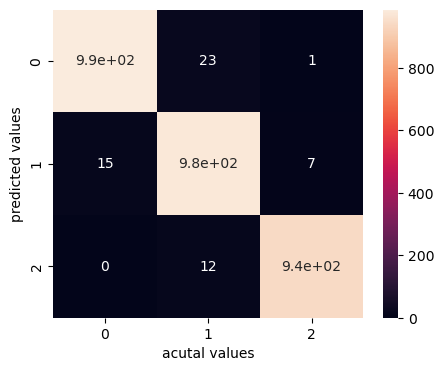

In [107]:
##Heatmap
pt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_pred,y_test),annot=True)
pt.xlabel('acutal values')
pt.ylabel('predicted values')
pt.show()

In [100]:
accuracy_dataframe3 = pd.DataFrame({"y_test": y_test, "y_pred": y_pred})

In [106]:
print( 'Acutally points are incorrectly classified',sum(accuracy_dataframe3['y_test']-accuracy_dataframe3['y_pred']),'points')

Acutally points are incorrectly classified 5 points


Acutally points are incorrectly classified 5 points
